In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [14]:
df = pd.read_csv('insurance.csv')

In [15]:
df.shape

(1338, 7)

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [224]:
df.drop_duplicates(inplace = True)

In [225]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [226]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [229]:
df_dum = pd.get_dummies(df['sex'], drop_first = True).astype(int)

In [230]:
df1 = pd.concat([df,df_dum], axis = 1)

In [156]:
df1

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [231]:
df1.drop(['sex'], axis =1, inplace = True)

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


In [232]:
df_1 = pd.get_dummies(df['region'], drop_first = True).astype(int)
df_2 = pd.get_dummies(df['smoker'], drop_first = True).astype(int)

In [233]:
df_final = pd.concat([df1,df_1,df_2], axis =1)

In [234]:
df_final.drop(['smoker', 'region'], axis =1 , inplace = True)

In [235]:
df_final

,age,bmi,children,charges,male,northwest,southeast,southwest,yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


In [236]:
df_final.rename(columns = {'yes': 'smoker'}, inplace = True)

In [237]:
df_final

,age,bmi,children,charges,male,northwest,southeast,southwest,smoker
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


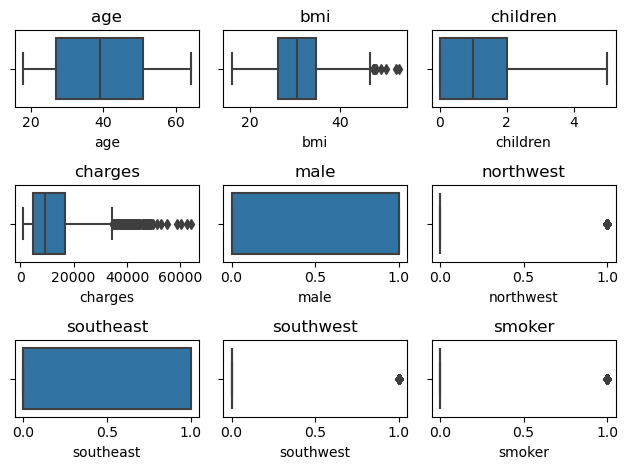

In [238]:
plt.figure()
for i in df_final.columns:
    plt.subplot(3,3,df_final.columns.get_loc(i) + 1)
    sns.boxplot(x = df_final[i])
    plt.title(i)
plt.tight_layout()
plt.show()

In [ ]:
# Charges and BMI have a lot of outliers

In [239]:
Q1 = df_final['bmi'].quantile(0.25)
Q3 = df_final['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers1 = df_final[(df_final['bmi'] < (Q1 - 1.5 * IQR)) | (df_final['bmi'] > (Q3 + 1.5 * IQR))]

In [240]:
outliers1.count()

age          9
bmi          9
children     9
charges      9
male         9
northwest    9
southeast    9
southwest    9
smoker       9
dtype: int64

In [173]:
##  df_clean = df_final[~((df_final['bmi'] < (Q1 - 1.5 * IQR)) | (df_final['bmi'] > (Q3 + 1.5 * IQR)))]

In [241]:
df_clean = df_final

In [242]:
Q1 = df_clean['charges'].quantile(0.25)
Q3 = df_clean['charges'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df_clean[(df_clean['charges'] < (Q1 - 1.5 * IQR)) | (df_clean['charges'] > (Q3 + 1.5 * IQR))]

In [243]:
df_clean[(df_clean['charges'] > (Q3 + 1.5 * IQR))]

,age,bmi,children,charges,male,northwest,southeast,southwest,smoker
14,27,42.130,0,39611.75770,1,0,1,0,1
19,30,35.300,0,36837.46700,1,0,0,1,1
23,34,31.920,1,37701.87680,0,0,0,0,1
29,31,36.300,2,38711.00000,1,0,0,1,1
30,22,35.600,0,35585.57600,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
1300,45,30.360,0,62592.87309,1,0,1,0,1
1301,62,30.875,3,46718.16325,1,1,0,0,1
1303,43,27.800,0,37829.72420,1,0,0,1,1
1313,19,34.700,2,36397.57600,0,0,0,1,1


In [199]:
## median = df_clean['charges'].median()
## df_clean['charges'] = np.where(df_clean['charges'] < (Q1 - 1.5*IQR),median , df_clean['charges'])
## df_clean['charges'] = np.where(df_clean['charges'] > (Q3 + 1.5*IQR), median, df_clean['charges'])

In [244]:
import warnings
warnings.filterwarnings('ignore')

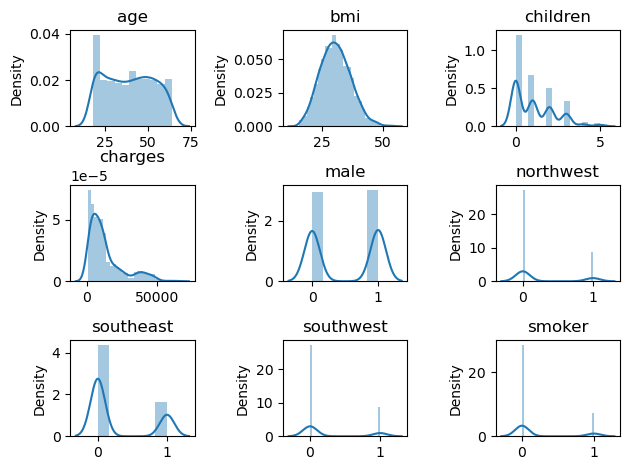

In [245]:
plt.figure()
for i in df_clean.columns:
    plt.subplot(3,3,df_clean.columns.get_loc(i) + 1)
    sns.distplot(x = df_clean[i])
    plt.title(i)

plt.tight_layout()
plt.show()

In [246]:
df_clean

,age,bmi,children,charges,male,northwest,southeast,southwest,smoker
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


<Axes: >

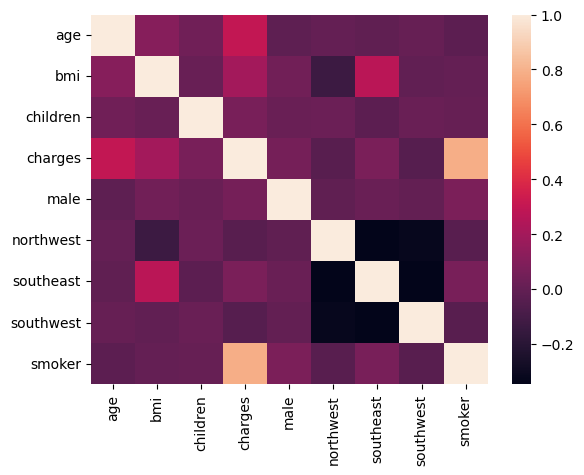

In [247]:
sns.heatmap(df_clean.corr())

In [248]:
x = df_clean.drop('charges', axis = 1)

In [249]:
y = df_clean['charges']

In [250]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.75, random_state= 15)

In [264]:
lm = LinearRegression()

In [265]:
model = lm.fit(x_train, y_train)

In [266]:
model

LinearRegression()

In [267]:
print(model.coef_)

[  246.1854079    351.08424721   440.48449933  -124.11834016
  -478.50294897 -1449.59239982 -1136.13385541 24054.98868533]


In [268]:
print(model.intercept_)

-11626.233011117978


In [269]:
y_predicted = model.predict(x_test)
y_predicted_train = model.predict(x_train)

In [270]:
mse = mean_squared_error(y_test, y_predicted)

In [271]:
R2_TEST = r2_score(y_test,y_predicted)
R2_TRAIN = r2_score(y_train, y_predicted_train)

In [261]:
R2_TRAIN

0.7467285396880967

In [272]:
print('Mean Squared Error : ', mse)
print('R-squared Score (Train) : ', R2_TRAIN )
print('R-squared Score (Test) : ', R2_TEST )

Mean Squared Error :  34531900.06262554
R-squared Score (Train) :  0.7459191901976778
R-squared Score (Test) :  0.7635335866331381


In [293]:
lasso1 = Lasso()


In [294]:
lasso2 = lasso1.fit(x_train,y_train)

In [295]:
lasso_train_predicted = lasso2.predict(x_train)
lasso_test_predicted = lasso2.predict(x_test)

In [297]:
rsquare_train = r2_score(y_train,lasso_train_predicted)
rsquare_test = r2_score(y_test, lasso_test_predicted)
rmse = mean_squared_error(y_test, lasso_test_predicted)

In [298]:
print('rmse : ', rmse)
print('rsquare_train : ',rsquare_train)
print('rsquare_test : ',rsquare_test)

rmse :  34524444.79544698
rsquare_train :  0.7459187567449536
rsquare_test :  0.7635846385673557


In [299]:
ridge1 = Ridge()

In [301]:
model2 = ridge1.fit(x_train,y_train)

In [303]:
ridgetrain = model2.predict(x_train)

In [304]:
ridgetest = model2.predict(x_test)

In [305]:
rsquare_train1 = r2_score(y_train,ridgetrain)
rsquare_test1 = r2_score(y_test, ridgetest)
rmse1 = mean_squared_error(y_test, ridgetest)

In [306]:
print('rmse1 : ', rmse1)
print('rsquare_train1 : ',rsquare_train1)
print('rsquare_test1 : ',rsquare_test1)

rmse1 :  34486907.269459866
rsquare_train1 :  0.7458940014446471
rsquare_test1 :  0.7638416868074103


In [308]:
elast = ElasticNet()
elast1 = elast.fit(x_train,y_train)

In [309]:
elast_train = elast1.predict(x_train)
elast_test = elast1.predict(x_test)

In [310]:
rsquare_train2 = r2_score(y_train,elast_train)
rsquare_test2 = r2_score(y_test, elast_test)
rmse2 = mean_squared_error(y_test, elast_test)

In [311]:
print('rmse2 : ', rmse2)
print('rsquare_train2 : ',rsquare_train2)
print('rsquare_test2 : ',rsquare_test2)

rmse2 :  86711762.84312361
rsquare_train2 :  0.3854643517991081
rsquare_test2 :  0.40621803262938194


In [318]:
des = DecisionTreeRegressor()
des.fit(x_train,y_train)

DecisionTreeRegressor()

In [319]:
des_train = des.predict(x_train)
des_test = des.predict(x_test)

In [320]:
rsquare_train3 = r2_score(y_train,des_train)
rsquare_test3 = r2_score(y_test, des_test)
rmse3 = mean_squared_error(y_test, des_test)

In [321]:
print('rmse3 : ', rmse3)
print('rsquare_train3 : ',rsquare_train3)
print('rsquare_test3 : ',rsquare_test3)

rmse3 :  45746458.41874549
rsquare_train3 :  0.9982219926995122
rsquare_test3 :  0.6867389015113885


In [322]:
ran = RandomForestRegressor()

In [323]:
ran

RandomForestRegressor()

In [325]:
ran.fit(x_train,y_train)

RandomForestRegressor()

In [326]:
ran_train = ran.predict(x_train)
ran_test = ran.predict(x_test)

In [328]:
rsquare_train4 = r2_score(y_train,ran_train)
rsquare_test4 = r2_score(y_test, ran_test)
rmse4 = mean_squared_error(y_test, ran_test)

In [329]:
print('rmse4 : ', rmse4)
print('rsquare_train4 : ',rsquare_train4)
print('rsquare_test4 : ',rsquare_test4)

rmse4 :  23462624.914472926
rsquare_train4 :  0.9770045649105762
rsquare_test4 :  0.8393334061654425
